In [11]:
import requests
import json

def get_weather_forecast(api_key, city, units='metric'):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    complete_url = base_url + "?q=" + city + "&appid=" + api_key + "&units=" + units
    response = requests.get(complete_url)
    data = response.json()

    if data['cod'] != '404':
        main = data['weather'][0]['main']
        description = data['weather'][0]['description']
        temp = data['main']['temp']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']

        print("Weather Forecast for " + city + ":")
        print("Main: " + main)
        print("Description: " + description)
        print("Temperature: " + str(temp) + " °C")
        print("Humidity: " + str(humidity) + " %")
        print("Pressure: " + str(pressure) + " hPa")
        print("Wind Speed: " + str(wind_speed) + " m/s")
    else:
        print("City not found. Please check the city name.")


def main():
    api_key = "a53d5b9e40b2d2c60af8d797c8c1ebc4"
    city = input('Enter City name: ')
    units = "metric"

    get_weather_forecast(api_key, city, units)



if __name__ == "__main__":
    main()

Enter City name: CHENNAI
Weather Forecast for CHENNAI:
Main: Clouds
Description: scattered clouds
Temperature: 34.39 °C
Humidity: 63 %
Pressure: 1006 hPa
Wind Speed: 5.66 m/s


In [13]:
import requests
import json

def get_weather_forecast(api_key, city, units='metric'):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    complete_url = base_url + "?q=" + city + "&appid=" + api_key + "&units=" + units
    response = requests.get(complete_url)
    data = response.json()

    if data['cod'] != '404':
        return data
    else:
        print("City not found. Please check the city name.")
        return None

def check_condition(main, description):
    if 'rain' in main.lower() or 'drizzle' in main.lower() or 'shower' in main.lower():
        return True
    elif 'clear' in main.lower() or 'sunny' in main.lower():
        return False
    elif 'clouds' in main.lower() or 'overcast' in description.lower():
        return None
    else:
        return None

def main():
    api_key = "a53d5b9e40b2d2c60af8d797c8c1ebc4"  

    city = input('Enter City name: ')
    units = "metric"

    weather_data = get_weather_forecast(api_key, city, units)

    if weather_data:
        main_weather = weather_data['weather'][0]['main']
        description = weather_data['weather'][0]['description']

        condition = check_condition(main_weather, description)

        if condition is True:
            print("It is raining or drizzling. Take an umbrella.")
        elif condition is False:
            print("It is clear or sunny. No need for an umbrella.")
        elif condition is None:
            print("It is cloudy or overcast. Bring an umbrella just in case.")
        else:
            print("Unknown condition. Please check the weather forecast.")

if __name__ == "__main__":
    main()


Enter City name: KANYAKUMARI
It is cloudy or overcast. Bring an umbrella just in case.


In [6]:
pip install requests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import requests

def get_weather_forecast(api_key, city, units='metric'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    params = {'q': city, 'units': units, 'appid': api_key}

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if response.status_code == 200:
            return data
        else:
            print(f"Error: {data['message']}")
            return None

    except requests.ConnectionError:
        print("Connection Error. Please check your internet connection.")
        return None

def display_weather_info(weather_data):
    if weather_data:
        main = weather_data.get('weather', [])[0].get('main', 'N/A')
        description = weather_data.get('weather', [])[0].get('description', 'N/A')
        temp = weather_data.get('main', {}).get('temp', 'N/A')

        print(f"Weather: {main}")
        print(f"Description: {description}")
        print(f"Temperature: {temp}°C")
    else:
        print("No weather data available.")

def main():
    api_key = 'a53d5b9e40b2d2c60af8d797c8c1ebc4' 
    city = 'Chennai'
    units = 'metric'  # Use 'imperial' for Fahrenheit or 'metric' for Celsius

    weather_data = get_weather_forecast(api_key, city, units)
    display_weather_info(weather_data)

if __name__ == "__main__":
    main()


Weather: Clouds
Description: scattered clouds
Temperature: 34.39°C


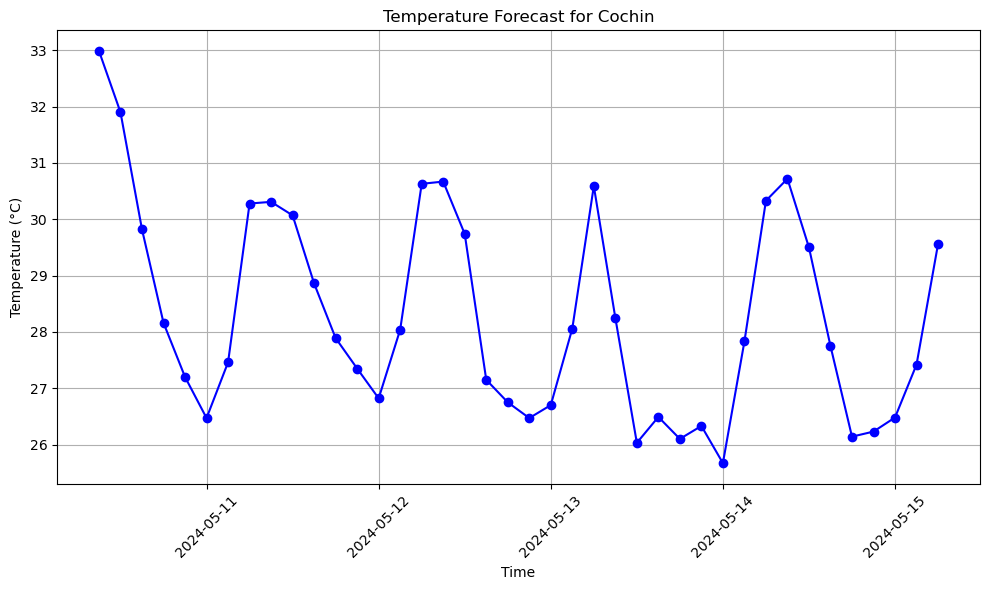

In [8]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_weather_forecast(api_key, city, units="metric"):
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    params = {"q": city, "units": units, "appid": api_key}

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if data['cod'] == '200':
            return data
        else:
            print(f"Error: {data['message']}")
            return None
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def plot_temperature_forecast(timestamps, temperatures, city):
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, temperatures, marker='o', linestyle='-', color='b')
    plt.title(f'Temperature Forecast for {city}')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    api_key = 'a53d5b9e40b2d2c60af8d797c8c1ebc4'
    city = "Cochin"
    units = "metric"

    data = get_weather_forecast(api_key, city, units)

    if data:
        timestamps = []
        temperatures = []

        for entry in data['list']:
            timestamp = datetime.utcfromtimestamp(entry['dt'])
            temperature = entry['main']['temp']
            timestamps.append(timestamp)
            temperatures.append(temperature)

        plot_temperature_forecast(timestamps, temperatures, city)

if __name__ == "__main__":
    main()


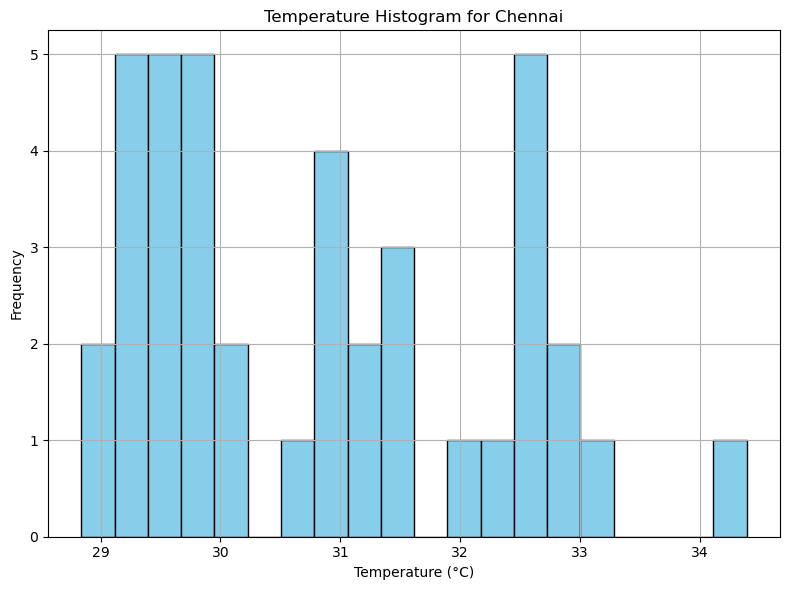

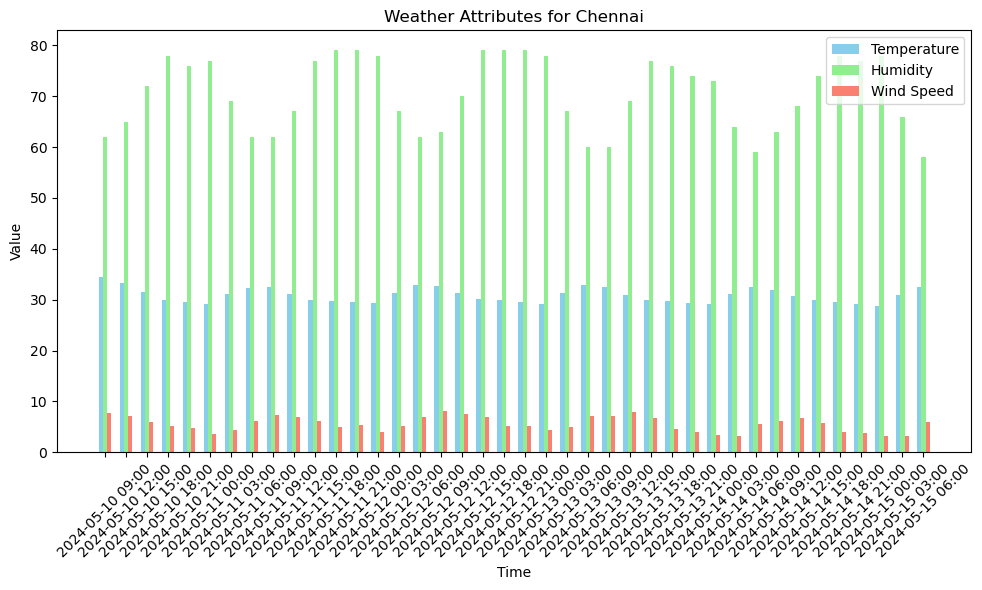

In [9]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def get_weather_forecast(api_key, city, units="metric"):
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    params = {"q": city, "units": units, "appid": api_key}

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if data['cod'] == '200':
            return data
        else:
            print(f"Error: {data['message']}")
            return None
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def plot_temperature_histogram(temperatures, city):
    plt.figure(figsize=(8, 6))
    plt.hist(temperatures, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Temperature Histogram for {city}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_weather_bar_chart(timestamps, temperatures, humidities, wind_speeds, city):
    plt.figure(figsize=(10, 6))
    bar_width = 0.2
    index = np.arange(len(timestamps))

    plt.bar(index, temperatures, bar_width, label='Temperature', color='skyblue')
    plt.bar(index + bar_width, humidities, bar_width, label='Humidity', color='lightgreen')
    plt.bar(index + 2 * bar_width, wind_speeds, bar_width, label='Wind Speed', color='salmon')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Weather Attributes for {city}')
    plt.xticks(index + bar_width, [timestamp.strftime('%Y-%m-%d %H:%M') for timestamp in timestamps], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    api_key = 'a53d5b9e40b2d2c60af8d797c8c1ebc4'
    city = "Chennai"
    units = "metric"

    data = get_weather_forecast(api_key, city, units)

    if data:
        timestamps = []
        temperatures = []
        humidities = []
        wind_speeds = []

        for entry in data['list']:
            timestamp = datetime.utcfromtimestamp(entry['dt'])
            temperature = entry['main']['temp']
            humidity = entry['main']['humidity']
            wind_speed = entry['wind']['speed']
            timestamps.append(timestamp)
            temperatures.append(temperature)
            humidities.append(humidity)
            wind_speeds.append(wind_speed)

        plot_temperature_histogram(temperatures, city)
        plot_weather_bar_chart(timestamps, temperatures, humidities, wind_speeds, city)

if __name__ == "__main__":
    main()
